In [2]:
import sys
from tqdm import tqdm
sys.path.append('..')

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data.energy_data import EnergyDataset
from models.lstm import LSTM

In [3]:
timeseries = pd.read_csv('../data/data_preprocessed.csv')
timeseries = timeseries[['_value']]

In [4]:
train_dataset = EnergyDataset('../data/train.csv', window_size=4)
test_dataset = EnergyDataset('../data/test.csv', window_size=4)

train_loader = DataLoader(train_dataset, batch_size=4, drop_last=True, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, drop_last=True, shuffle=False)

X_train, y_train = train_dataset.return_X_y()
X_test, y_test = test_dataset.return_X_y()

In [5]:
model = LSTM(input_size=1, hidden_size=50, num_layers=1, output_size=1)
model.load_state_dict(torch.load('../saved_models/lstm_w4.pt'))

<All keys matched successfully>

In [6]:
with torch.no_grad():
    # shift train predictions for plotting
    y_pred_train = model(X_train)[:,-1,:]
    y_pred_test = model(X_test)[:,-1,:]

print(y_pred_train.shape, y_pred_test.shape, y_pred_test.shape[0] + y_pred_train.shape[0])

torch.Size([27202, 1]) torch.Size([6798, 1]) 34000


In [7]:
model(X_test).shape

torch.Size([6798, 4, 1])

In [8]:
y_pred = torch.cat([y_pred_train, y_pred_test], dim=0)
y_pred.shape

torch.Size([34000, 1])

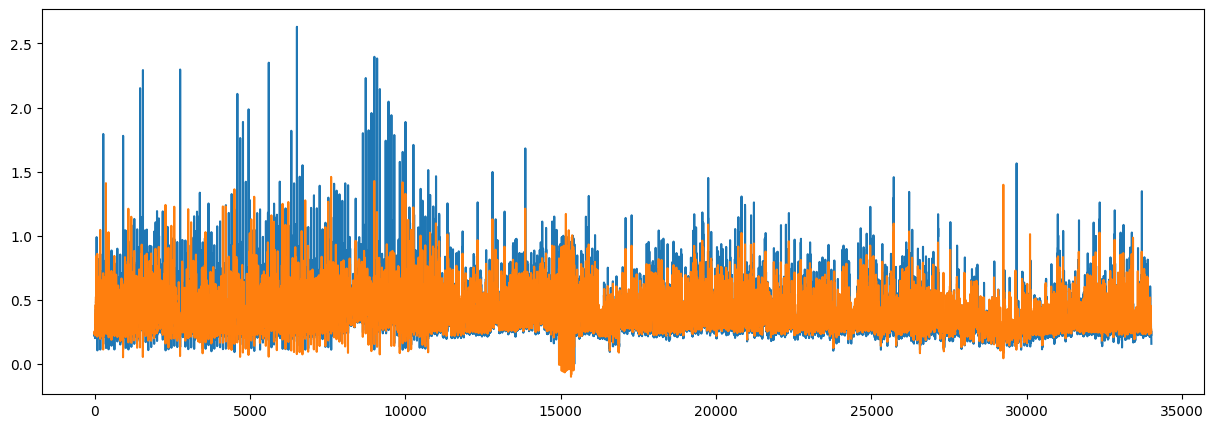

In [9]:
plt.figure(figsize=(15,5))

plt.plot(timeseries)
plt.plot(y_pred)

In [10]:
y_test = pd.read_csv('../data/test.csv')[['_value']]
y_train = pd.read_csv('../data/train.csv')[['_value']]

In [11]:
y_test = y_test[3:].values.tolist()

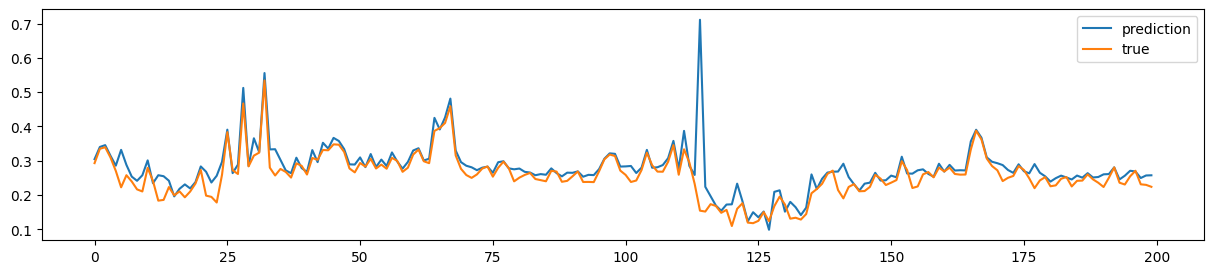

In [14]:
plt.figure(figsize=(15,3))
plt.plot(y_pred_test[:200], label='prediction')
plt.plot(y_test[:200], label='true')
plt.legend()
plt.show()

In [13]:
torch.save(model.state_dict(), '../saved_models/lstm_w4.pt')